# Import

In [1]:
# Publicly available signatures
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config IPCompleter.use_jedi = False
import matplotlib.pyplot as plt
import copy
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from pathlib import Path

In [2]:
# Code from utils directory
from utils.utils import *
from utils.plotting import *
from utils.classification import *

In [3]:
# Config for pictures
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 120
sns.set_style('white')

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Palette

<Axes: >

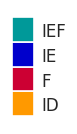

In [5]:
# Stating color palette for MFP subtypes
## IEF - Immune-Enriched/Fibrotic
## IE - Immune-Enriched
## F - Fibrotic
## ID - Immune Depleted
portrait_palette = {'IEF': '#009999', 'IE': '#0000CC', 'F': '#CC0033', 'ID': '#FF9900'}
portrait_order = ['IEF', 'IE', 'F', 'ID']
patch_plot(portrait_palette, order=portrait_order)

# Signatures

In [6]:
# Reading gmt file with gene signatures
signatures = read_gene_sets('./genesets/PAAD_genesets.gmt')

In [7]:
# All available gene signatures
selected_signatures = ['MHCI', 'MHCII', 'Coactivation_molecules', 'Effector_cells', 
                   'NK_cells', 'T_cells', 'T_cell_traffic' , 'B_cells', 'M1_signatures', 'Th1_signature', 
                   'Antitumor_cytokines', 'Checkpoint_inhibition', 'Treg', 'Mast_cell_signature', 'MDSC', 
                   'M2_signature', 'Th2_signature', 'Protumor_cytokines', 'Angiogenesis', 'Endothelium', 
                   'CAF_associated', 'Proliferation_rate', 'Oncogenes_PDAC', 'EMT_signature', 
                   'Hu-Lgr5-ISC']

# Read cohort

In [8]:
# Pancreatinc Adenocarcinoma Meta-cohort annotation
# This annotation include predicted Moffitt, Collison, Bailey subtypes and MFP (TME) subtypes as well 
cohort_ann = read_dataset('./data/PAAD_meta_cohort_annotation.tsv')
print(cohort_ann.shape)
cohort_ann.head()

(1657, 5)


,Moffitt_tumor_predicted,Collison_predicted,Bailey_predicted,MFP,Cohort
PANC78,Classical,Classical,Immunogenic,IE,PUB_Puleo_Belgium
PANC63,Classical,Exocrine,ADEX,IEF,PUB_Puleo_Belgium
PANC70,Classical,Exocrine,ADEX,IEF,PUB_Puleo_Belgium
PANC19,Classical,Exocrine,ADEX,IEF,PUB_Puleo_Belgium
PANC32,Basal-like,QM,Squamous,ID,PUB_Puleo_Belgium


In [9]:
# Pancreatinc Adenocarcinoma Meta-cohort signatures scaled
cohort_sign_sc = read_dataset('./data/PAAD_meta_cohort_signatures_scaled.tsv')
print(cohort_sign_sc.shape)
cohort_sign_sc.head()

(25, 1657)


,PANC78,PANC63,PANC70,PANC19,PANC32,PANC39,PANC89,PANC4,PANC16,PANC22,...,TCGA-IB-7889,TCGA-IB-7646,TCGA-XN-A8T5,TCGA-IB-7891,TCGA-2J-AABU,TCGA-2J-AABT,TCGA-H6-8124,TCGA-Z5-AAPL,TCGA-FB-AAQ2,TCGA-IB-AAUO
BG genesets,,,,,,,,,,,,,,,,,,,,,
MHCI,0.606150,-0.227116,0.460422,-2.000000,-0.813501,0.398809,0.089988,0.510231,-0.187856,1.611373,...,-1.210678,0.907387,0.499413,0.543343,-0.924815,-0.183660,-2.000000,2.000000,0.249570,1.781808
MHCII,-0.544188,0.030789,0.383031,-0.160907,-1.179368,1.204366,0.221599,0.994753,1.222704,1.806902,...,0.621466,0.918158,0.613536,0.819935,-1.624376,0.709132,-2.000000,1.034331,-2.000000,-0.931479
Coactivation_molecules,0.663965,-1.164686,-0.560165,0.133750,-0.934609,0.482492,0.103265,1.319433,0.127052,2.000000,...,0.435616,0.423487,1.411425,0.826546,-0.803000,0.006692,-1.348642,2.000000,-2.000000,-0.075043
Effector_cells,0.755973,-0.294042,0.744220,0.325557,0.064570,-0.728427,-0.477813,2.000000,0.914947,2.000000,...,1.363724,0.554666,1.876188,0.951173,0.688693,-0.161404,-0.716007,2.000000,-0.653495,0.932462
NK_cells,1.281684,0.688707,0.842955,0.865528,-0.262646,-0.098121,-0.201663,2.000000,-0.694573,2.000000,...,1.442844,0.899897,1.528195,0.627167,0.794668,-0.275831,-1.287383,2.000000,-0.777866,1.668678


<Axes: xlabel='PCA 1 component 33% variance explained', ylabel='PCA 2 component 13% variance explained'>

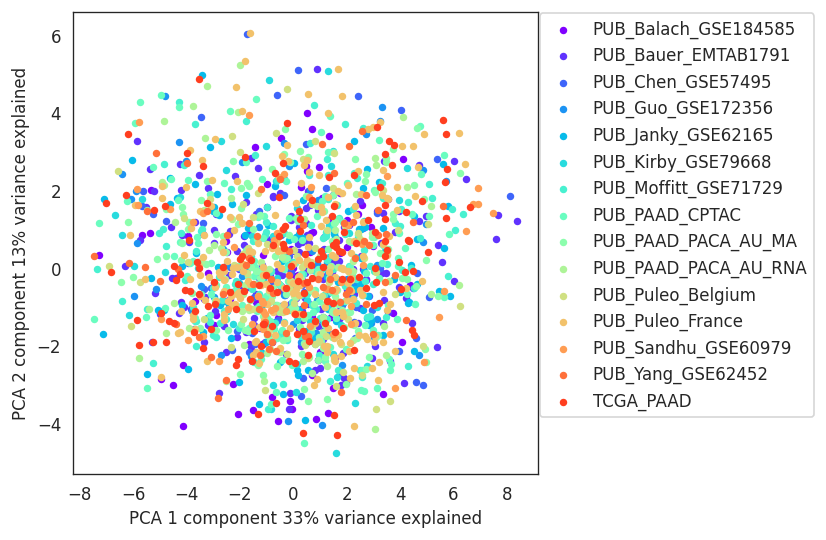

In [10]:
# PCA-plot for all samples from Meta-cohort colored by cohort
pca_plot(cohort_sign_sc.loc[selected_signatures].T, cohort_ann.Cohort, legend='out')

<Axes: xlabel='PCA 1 component 33% variance explained', ylabel='PCA 2 component 13% variance explained'>

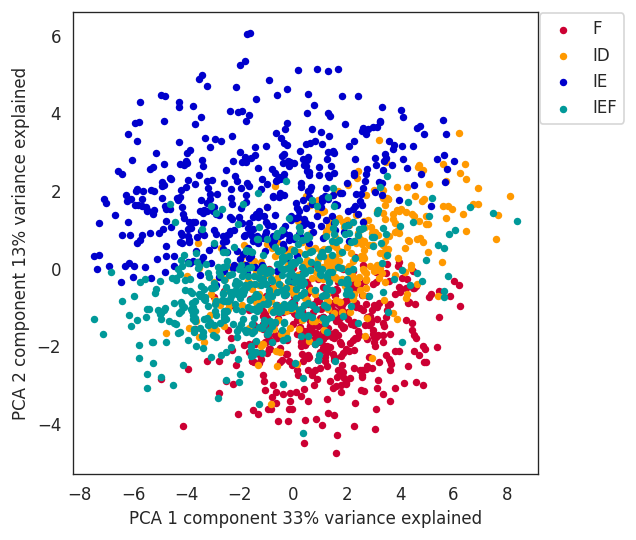

In [11]:
# PCA-plot for all samples from Meta-cohort colored by MFP subtype
pca_plot(cohort_sign_sc.loc[selected_signatures].T, cohort_ann.MFP.dropna(), 
         palette=portrait_palette, legend='out')

# Model

In [12]:
# Supervised learning - fitting KNN model from sklearn
## Train_X - Meta-cohort scaled gene signatures scores
## Train_y - MFP subtypes taken from Meta-cohort annotation
MFP_MODEL = KNeighborsClusterClassifier(norm=False, scale=False, 
                                        clip=3, k=35).fit(cohort_sign_sc.loc[selected_signatures].T, 
                                                           cohort_ann.MFP)

# Cohort classification example

Let's take additional PAAD dataset. Basically log2 transformed data of gene expressions is needed.

Here for example we will take cohort from ICGC PACA CA dataset: https://dcc.icgc.org/projects/PACA-CA

In [10]:
#Reading annotation
ann = read_dataset('./data/annotation.tsv')
print(ann.shape)
ann.head()

(179, 2)


,ICGC_Project_Code,Cohort
DO35083,ICGC_CA,ICGC_CA
DO35082,ICGC_CA,ICGC_CA
DO35085,ICGC_CA,ICGC_CA
DO35236,ICGC_CA,ICGC_CA
DO35230,ICGC_CA,ICGC_CA


In [11]:
#Reading annotation
## Note: this expression data is already log2(1+data) transformed
exp = read_dataset('./data/expressions.tsv')
print(exp.shape)
exp.head()

(179, 20023)


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1199
DO35083,1.911247,2.107440,7.308639,0.146655,0.0,1.079921,3.381462,5.770134,4.213658,2.734950,...,3.588433,1.944480,1.924632,2.672235,0.022776,2.612629,6.192881,4.362021,2.284715,2.528046
DO35082,1.080276,1.227415,6.121778,0.122649,0.0,3.642921,0.392823,3.673115,4.304080,2.149383,...,4.042802,2.095347,2.421738,4.366063,0.000000,1.818867,5.125490,4.640962,1.732187,1.596291
DO35085,1.141073,0.695756,5.389106,3.323759,0.0,4.128368,0.022810,4.612240,4.577260,2.247651,...,2.877157,1.588430,1.903490,3.911145,0.016892,2.343084,4.687066,5.363910,3.241750,1.047343
DO35236,0.572249,4.033379,6.982834,0.088728,0.0,1.787341,1.079846,5.425701,3.758133,1.762085,...,1.996776,1.986629,1.999159,3.420207,0.014763,2.922236,5.888858,4.975855,2.868622,1.959002
DO35230,0.445576,3.940270,6.553059,0.008225,0.0,3.068499,0.032814,5.011039,4.440461,4.377714,...,2.855721,1.761234,2.274238,2.806233,0.000000,2.809005,5.793670,4.709208,2.773131,2.499185


<Axes: ylabel='Density'>

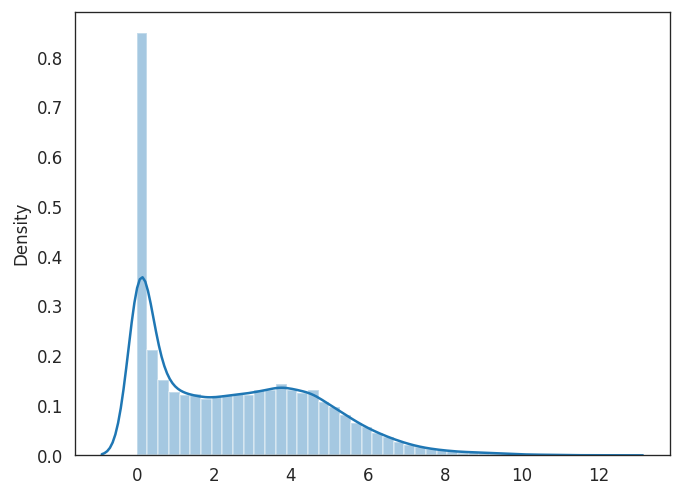

In [15]:
# Let's see distribution of expressions of genes
sns.distplot(exp.mean())

<Axes: xlabel='PCA 1 component 9% variance explained', ylabel='PCA 2 component 5% variance explained'>

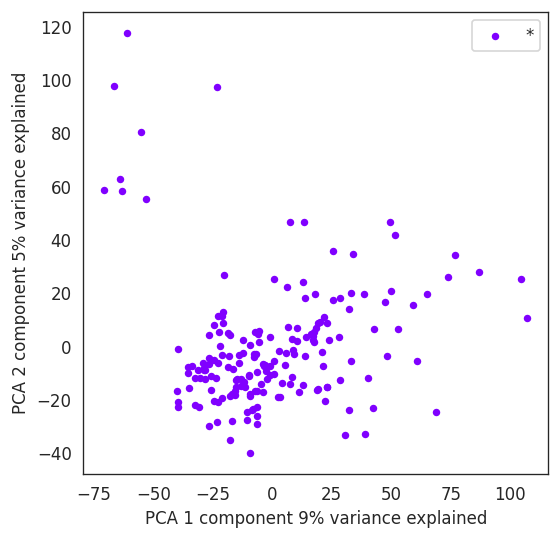

In [16]:
# Check for presence of batches in cohort is needed 
pca_plot(exp)

No big batches can be observed in this dataset, according to PCA components variance explained (9% and 5%)

* Note that for every dataset or a batch median scalling should be used separately. 
* Note for small datasets/batches: For one RNA-seq sample or a small cohort (<20 samples) it is suggested to add samples to TCGA cohort and classify them together. Be aware, that you should drop TCGA cohort from pancancer dataset.

# Calc signatures

In [17]:
# Calculating gene signatures
sign = ssgsea_formula(exp.T, signatures).T

# Median scaling
sign_sc = median_scale(sign, clip=2)
print(sign_sc.shape)
sign_sc.head()

(179, 25)


,MHCI,MHCII,Coactivation_molecules,Effector_cells,NK_cells,T_cells,B_cells,M1_signatures,Th1_signature,Antitumor_cytokines,...,Th2_signature,Protumor_cytokines,Angiogenesis,Endothelium,CAF_associated,Proliferation_rate,Oncogenes_PDAC,EMT_signature,T_cell_traffic,Hu-Lgr5-ISC
DO35083,1.415720,0.876114,-0.988613,0.478073,0.383331,1.036458,2.000000,0.645592,0.901380,1.206906,...,-0.597046,1.269846,-0.327140,-0.740118,-1.090014,1.552422,0.820169,-1.066501,2.000000,-1.450991
DO35082,0.551264,0.112504,0.357509,-1.249130,-1.547919,-1.247691,-0.377788,2.000000,-2.000000,-0.857043,...,-0.560206,1.300938,0.477400,-0.144412,0.529745,0.755341,0.845257,1.230011,0.701472,0.766227
DO35085,1.366210,0.024186,0.108928,1.029811,1.390962,0.176599,-1.745459,-1.284379,0.852050,0.077529,...,1.920684,0.851464,0.481496,0.003653,0.058112,-0.234531,-1.276393,0.958198,1.100451,1.463341
DO35236,-0.207344,-1.752222,-1.256352,-1.118299,-0.751260,-0.911814,0.258372,-0.033179,-1.191163,-0.446755,...,1.523312,-0.456810,-1.489194,-1.051460,-0.533782,-1.962786,-0.274114,-0.410200,0.135444,0.724303
DO35230,-1.993076,-0.542433,-1.216003,0.361625,0.822523,0.000000,0.515980,-0.780715,0.009874,-0.977764,...,-0.119889,-1.122854,-1.031398,-0.333281,-2.000000,-0.899086,0.714152,-1.488491,0.164225,-1.893892


# Predict 

<Axes: xlabel='MFP'>

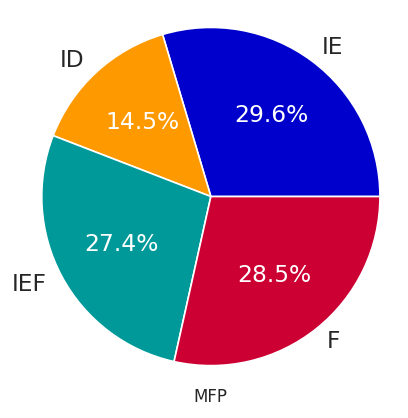

In [18]:
# KNN prediction for taken dataset
mfp_predicted = MFP_MODEL.predict(sign_sc).rename('MFP')

# Vector Pie-plot
vector_pie_plot(mfp_predicted, palette=portrait_palette)

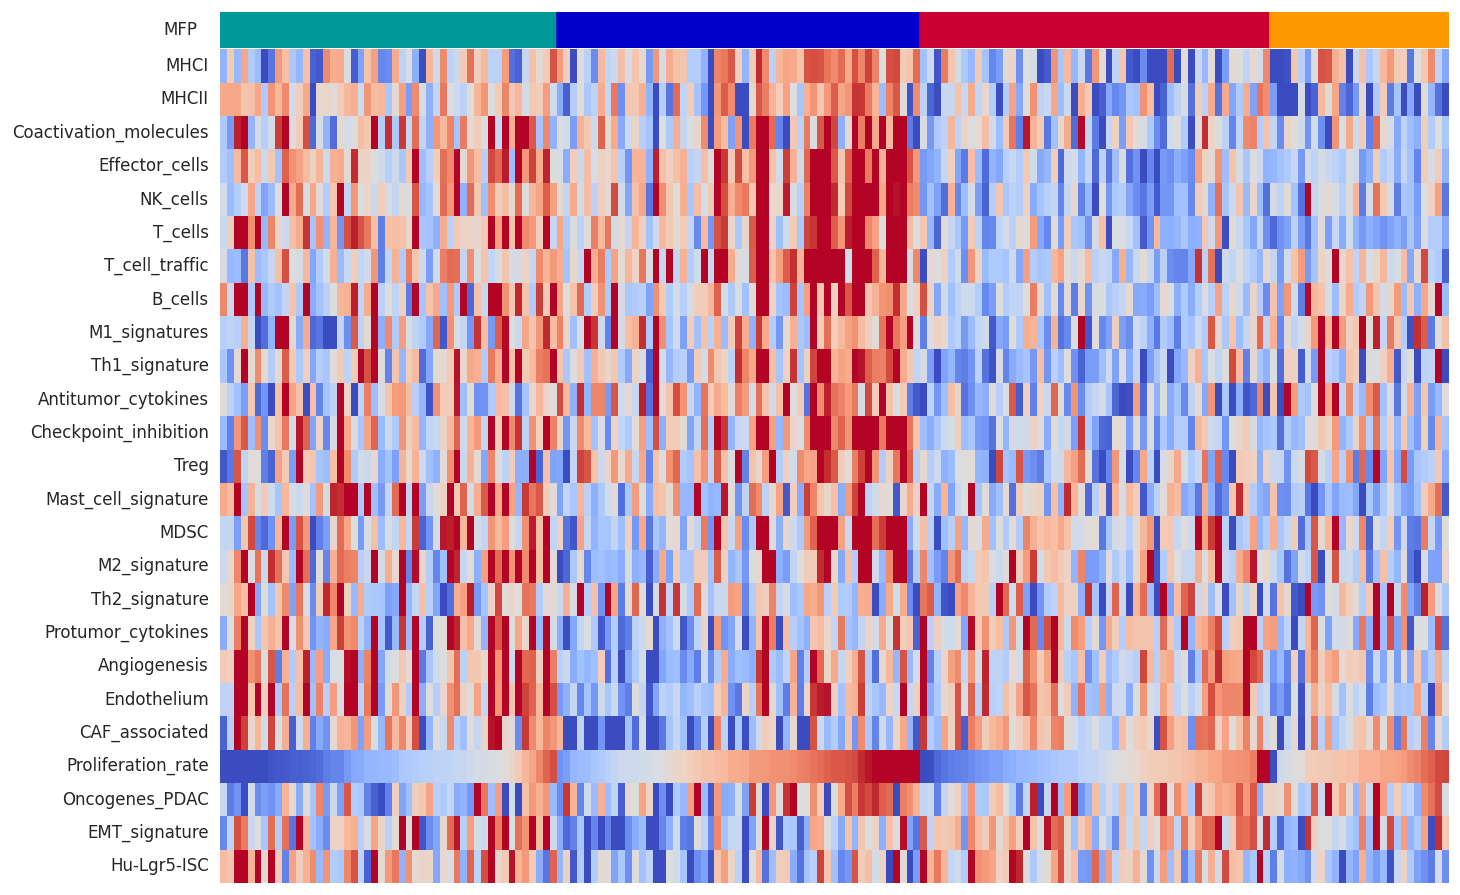

In [19]:
# sorting samples by MFP subtype with such order ['IEF', 'IE', 'F', 'ID']
## Note we use sign_sc['Proliferation_rate'] as additional sorting inside TME subtype
so = sort_by_terms_order(mfp_predicted, portrait_order, sign_sc['Proliferation_rate'])

# Stating subplots of a picture
af = axis_matras([.3, 7], x_len=12)

# Taking subplot
ax = next(af)

# Plotting samples' MFP subtype accoring to sorting order "so"
line_palette_annotation_plot(mfp_predicted[so], ax=ax, palette=portrait_palette)

# Taking next subplot
ax = next(af)

# Heatmap of scaled signatures for taken dataset
sns.heatmap(sign_sc.loc[so, selected_signatures].T, vmin=-2, vmax=2,
            yticklabels=True, xticklabels=False, cbar=False, cmap=plt.cm.coolwarm, ax=ax)

plt.tight_layout(pad=.1)

In [20]:
# Let's also plot median signal for each TME subtype for taken dataset

sigs_median_value_TME = []

# Iterating for each TME subtype
for mfp_subtype in ['IEF', 'IE', 'F', 'ID']:
    
    # Taking samples from one TME subtype
    samples = mfp_predicted[mfp_predicted == mfp_subtype].index
    
    # Retrieving needed scaled gene signature scores
    sigs_sc_taken = sign_sc.loc[samples].T
    
    # Calculating median
    sigs_sc_taken_median = sigs_sc_taken.median(axis=1)
    
    # Appending to list
    sigs_median_value_TME.append(sigs_sc_taken_median)

# Concating all together
sigs_sc_median = pd.concat(sigs_median_value_TME, axis=1)
sigs_sc_median.columns = ['IEF', 'IE', 'F', 'ID']
sigs_sc_median.head()

,IEF,IE,F,ID
MHCI,-0.208046,0.593002,-0.405503,-0.002459
MHCII,0.428200,0.460742,-0.434679,-1.371007
Coactivation_molecules,0.142336,0.225258,-0.078250,-0.176904
Effector_cells,0.602154,0.727282,-0.836406,-0.427291
NK_cells,0.128354,0.871694,-0.768534,-0.119192


Note: in "sigs_sc_median" there are no samples' IDs, they were dropped during median scaling

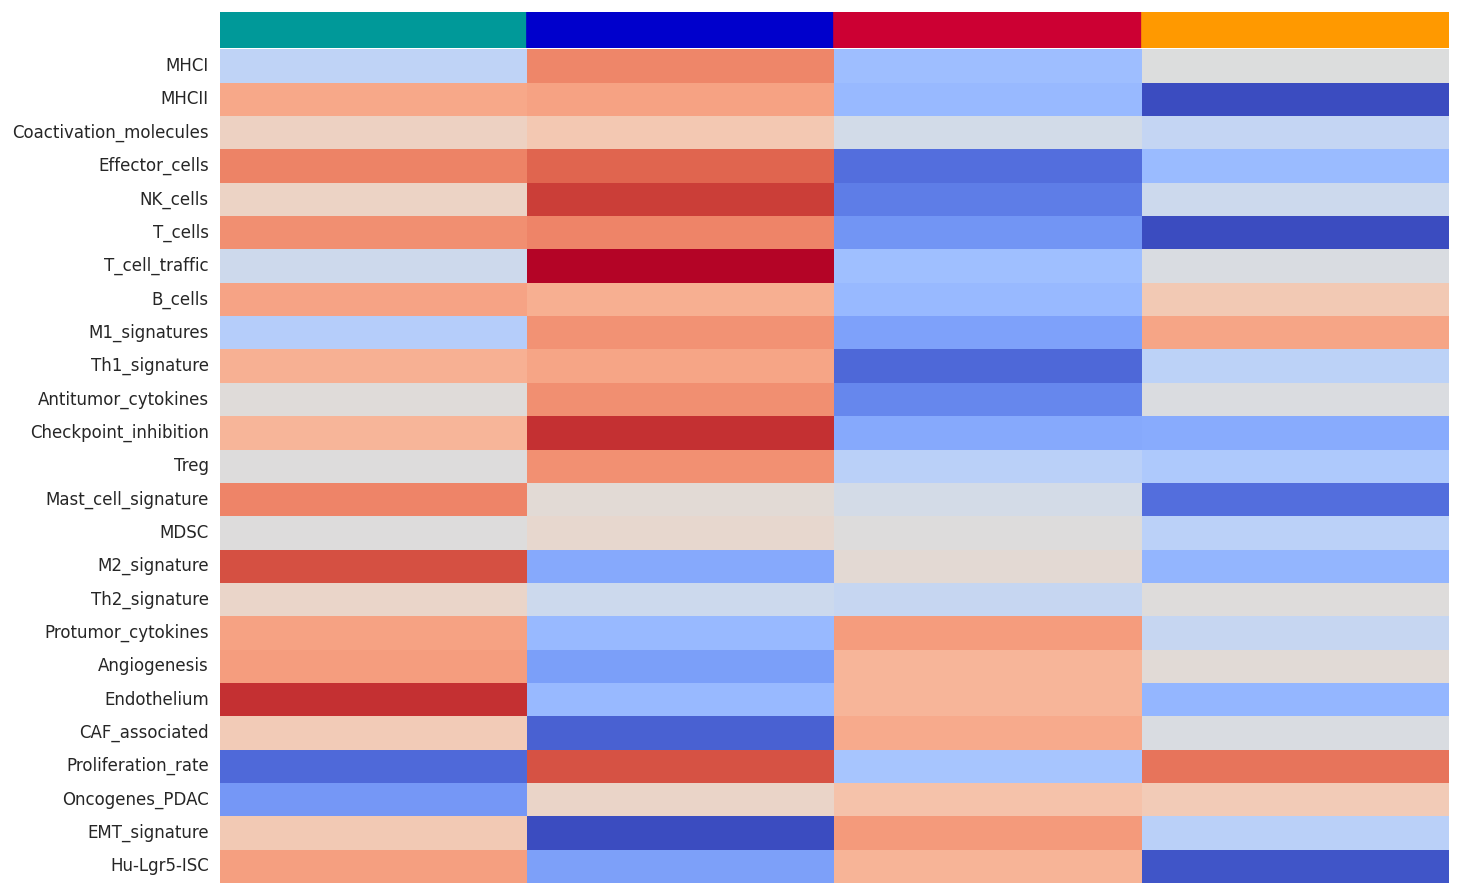

In [21]:
# Stating order
so_mfp_subtypes = ['IEF', 'IE', 'F', 'ID']

# Stating subplots of a picture
af = axis_matras([.3, 7], x_len=12)

# Taking subplot
ax = next(af)

# Creating instrumental pandas series and plotting
line_palette_annotation_plot(
    pd.Series({'IEF':'IEF', 'IE':'IE', 'F':'F', 'ID':'ID'}).loc[so_mfp_subtypes],
    palette=portrait_palette,
    ax=ax
)

# Taking next subplot
ax = next(af)

# Heatmap of median values of scaled signatures for each TME subtype for taken dataset
sns.heatmap(sigs_sc_median.loc[selected_signatures, so_mfp_subtypes], vmin=-1, vmax=1,
            yticklabels=True, xticklabels=False, cbar=False, cmap=plt.cm.coolwarm, ax=ax)

plt.tight_layout(pad=.1)

Final